# Project 1: Processing health and activity data [40 marks]

---

Make sure you read the instructions in `README.md` before starting! In particular, make sure your code is well-commented, with sensible structure, and easy to read throughout your notebook.

---

The MMASH dataset [1, 2] is is a dataset of health- and activity-related measurements taken on 22 different people, over a continuous period of 24 hours, using wearable devices.

In this project, we have provided you with some of this data for **10** of those individuals. In the `dataset` folder, you will find:

- a file `subject_info.txt` which summarises the age (in years), height (in cm), and weight (in kg) of all 10 study participants,
- 10 folders named `subject_X`, which each contain two files:
    - `heartbeats.txt` contains data on all individual heartbeats detected over the 24-hour study period,
    - `actigraph.txt` contains heart rate and other activity data measured with another device, over the same 24-hour period.

The tasks below will guide you through using your Python skills to process some of this data. Note that the data was reformatted slightly for the purpose of the assignment (to make your life a bit easier!), but the values are all the original ones from the real dataset.

### Getting stuck

Tasks 3 to 8 follow directly from each other. There is a `testing` folder provided for you with `.npy` files and a supplementary `actigraph.txt` dataset. The `.npy` files are NumPy arrays, which you can load directly using `np.load()`, containing an example of what the data should look like after each task. You will be able to use this example data to keep working on the later tasks, even if you get stuck on an earlier task. Look out for the 💾 instructions under each task.

These were produced using the data for another person which is not part of the 10 you have in your dataset.


### References

[1] Rossi, A., Da Pozzo, E., Menicagli, D., Tremolanti, C., Priami, C., Sirbu, A., Clifton, D., Martini, C., & Morelli, D. (2020). Multilevel Monitoring of Activity and Sleep in Healthy People (version 1.0.0). PhysioNet. https://doi.org/10.13026/cerq-fc86

[2] Rossi, A., Da Pozzo, E., Menicagli, D., Tremolanti, C., Priami, C., Sirbu, A., Clifton, D., Martini, C., & Morelli, D. (2020). A Public Dataset of 24-h Multi-Levels Psycho-Physiological Responses in Young Healthy Adults. Data, 5(4), 91. https://doi.org/10.3390/data5040091.

---
## Task 1: Reading the subject information

The file `subject_info.txt` in your `dataset` folder summarises the age (in years), height (in cm), and weight (in kg) of all 10 study participants.

---
🚩 ***Task 1:*** Write a function `read_subject_info()` which reads in the information in `subject_info.txt`, and returns two outputs:

- a list `headers` containing the four column headers as strings, read from the first line in the file;
- a NumPy array `info` containing the numerical information for each person (i.e. it should have 10 rows and 4 columns).

**Important:** the height of each subject should be given in **metres** in your `info` array.

**[3 marks]**

In [107]:
%matplotlib inline

In [1]:
def read_subject_info():
    
    """""
    
    This Function reads subject_info.txt file .
    It returns headers - a list  containing the four column headers as strings, 
                         read from the first line in the file .
    It also returns info - a NumPy array info containing the numerical information for each person 
                         (i.e. it should have 10 rows and 4 columns).
                         
    """""
    
    # import the libraries
    import pandas as pd   # imports pandas library with pd as short calling name
    import numpy as np    # imports numpy library with np as short calling name
    
    
    # reads subject_info.txt file and stores it as pd dataframe in data
    data = pd.read_csv('dataset/subject_info.txt')   
    
    # working on headers
    # headers is a list  containing the four column names of data as strings
    headers=[i for i in data]                       
    
    
    # working on info
    # converting height from cms to metres in data
    data['Height']=data['Height']/100
    
    # info is a numpy array containing containing the numerical information of data as 2-d array
    info=np.array(data)
    
    
    # returns headers = a list and info = a numpy 2-d array
    return(headers,info)

---
## Task 2: Charting the Body Mass Index (BMI) for all participants

The Body Mass Index (BMI) can be used to indicate whether someone is at a healthy body weight. [The NHS website](https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/) describes it as follows:

> The body mass index (BMI) is a measure that uses your height and weight to work out if your weight is healthy.
>
> The BMI calculation divides an adult's weight in kilograms by their height in metres, squared. For example, a BMI of $25$ means $25 \text{kg/m}^2$.
>
> For most adults, an ideal BMI is in the $18.5$ to $24.9$ range.

This means that the BMI is calculated as follows:

$$
\text{BMI} = \frac{\text{weight}}{\text{height}^2}.
$$

---
🚩 ***Task 2:*** Write a function `bmi_chart(info)` which takes as input the `info` array returned by `read_subject_info()`, produces a visualisation showing all subjects' heights and weights on a graph, and clearly indicates whether they are within the "healthy weight" range as described above (i.e. their BMI is in the $18.5$ to $24.9$ range).

Your function should not return anything, but calling it with `bmi_chart(info)` must be sufficient to display the visualisation.

You should choose carefully how to lay out your plot so that it is easy to interpret and understand.

**[4 marks]**

In [6]:
def bmi_chart(info = read_subject_info()[1]):
 """""
    
    This Function  takes as input the info array returned by read_subject_info() .
    
    It produces a visualisation showing all subjects' heights on a graph, and clearly indicates whether 
    they are within the "healthy weight" range as described above (i.e. they are within 18.5 to  24.9 range).
                         
 """""
    
 # import the libraries
 import matplotlib.pyplot as plt # imports matplotlib.pyplot with calling name plt
 import pandas as pd             # imports pandas with calling name pd
 import numpy as np              # imports numpy with calling name np


 # data is dataframe containing :
 #  1) info as elements (parameter of function (calls read_subject_info() 
 #     and takes its second value which has index place of 1)
 #  2) column names are index 0 of what read_subject_info() returns - the numerical values of data

 data = pd.DataFrame(info,columns = read_subject_info()[0])
    
    
    
 # tabulating BMI as given in formula BMI = Weight / Height ** 2 
 data["BMI"] = data['Weight'] / data['Height'] ** 2
 


 # lower and upper bound of healthy weight is tabulated by lower and upper bound of ideal bmi = 
 # (18.5 to  24.9 range). 
 # ideal weight = ideal bmi * height ** 2 

 data["healthy_weight_lower"]=18.5*data['Height']**2   # lower bound
 data["healthy_weight_upper"]=24.9*data['Height']**2   # upper bound
  

    
 # Those weights which are not within above tabulated ideal weight range are kept in a new column
 # data["healthy_weight_upper_unhealthy"] 
    
 # data["healthy_weight_upper_unhealthy"] is created and assigned to null 
 data["healthy_weight_upper_unhealthy"]=np.nan                  
  
 # for loop : i traverses all row elemnts of data ie 0 to 9
 for i in range(data.shape[1]):   
    
  # if weight column value is greater than corresponding healthy_weight_upper column value of data 
  if (data['Weight'][i]>data["healthy_weight_upper"][i]):

   # then corresponding healthy_weight_upper column = weight column value
   data["healthy_weight_upper_unhealthy"][i]=data['Weight'][i] 
    
    
 # t5,t4,t3,t2,t1 are the blocks of texts which will be displayed on graph   
 t5= "Yellow lines above show the lower and upper limit"
 t4= "of healthy weight based on corresponding height ."
 t3= "The blue line is the actual weight of the 10 subjects . The red spots are clearly those weights"
 t2= "which are not within the lower and upper bound of healthy weights."
 t1= "we can clearly sees subjects corresponding to those weights are not healthy according to BMI - Subject 1 and 7."

    
    
 # fonts

 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # font of axes
 font2 = {'family':'serif','color':'darkred','size':15}

 # font of text displayed on graph
 font_text = {'family':'serif','color':'darkgreen','size':10}
 
    
    
 # plotting title and x,y labels on graph

 # Title
 plt.title("Healthy Weight", fontdict = font1)

 # X label
 plt.xlabel("Subject", fontdict = font2)

 # Y label
 plt.ylabel("Weights (Kg)", fontdict = font2)



 # Plotting the lines on the graph -  Actual Weight , ideal lower weight limit, ideal upper weight limit
 # and those weights which are not ideal ( ie outside of upper bound)
    
 # Actual Weight - Subject Vs Weight
 plt.plot(data["Subject"], data["Weight"], 'bo-')
    
 # ideal lower weight limit - Subject Vs those weights which are not ideal( ie outside of upper bound)
 plt.plot(data["Subject"], data["healthy_weight_upper_unhealthy"],  'r*-')
    
 # ideal lower weight limit - Subject Vs healthy_weight_lower   
 plt.plot(data["Subject"], data["healthy_weight_lower"],  'y<-')
    
 # ideal upper weight limit - Subject Vs healthy_weight_upper
 plt.plot(data["Subject"], data["healthy_weight_upper"],  'y<-')

    
 # this code block is to add the text to our graph - All the text that is displayed comes from here -
 # t1,t2,t3,t4,t5

 # T1
 plt.text(4,1, t1, fontdict = font_text, style='oblique', ha='center',
         va='top', wrap=True)
    
 # T2
 plt.text(2,10, t2, fontdict = font_text, style='oblique', ha='center',
         va='top', wrap=True)
    
 # T3
 plt.text(3,15, t3, fontdict = font_text, style='oblique', ha='center',
         va='top', wrap=True)
    
 # T4
 plt.text(1,25, t4, fontdict = font_text, style='oblique', ha='center',
         va='top', wrap=True)
    
 # T5
 plt.text(1,30, t5, fontdict = font_text, style='oblique', ha='center',
         va='top', wrap=True)

 # show the plot
 plt.show()

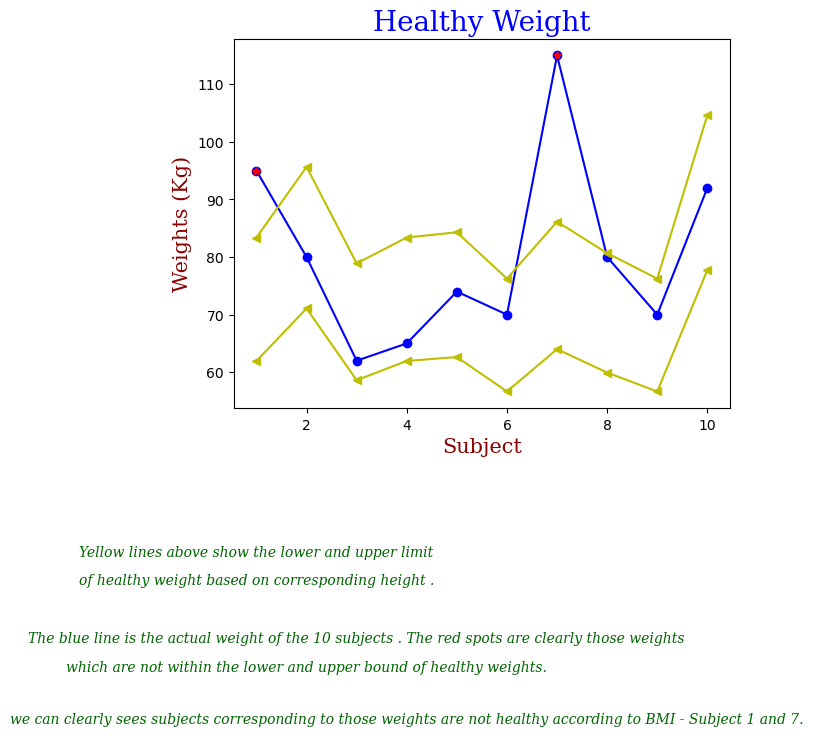

In [7]:
bmi_chart()

---
## Task 3: Instantaneous heart rate data

For each subject, the file `heartbeats.txt` contains data on all individual heartbeats detected over the 24-hour study period. Specifically, the two columns record the time at which each heartbeat was detected, and the interval (in seconds) between the current heartbeat and the previous one.

### Handling timestamp data

For the next tasks, you will use NumPy's `datetime64[s]` and `timedelta64[s]` object types, respectively used to represent times (as if read on a clock) and time intervals. You should [consult the relevant documentation](https://numpy.org/doc/stable/reference/arrays.datetime.html#datetimes-and-timedeltas).

Here are a few illustrative examples:

['2022-10-20T00:00:00' '2022-10-23T00:00:00' '2022-10-28T00:00:00']
1814400 seconds
<class 'numpy.timedelta64'>
1814400.0
<class 'numpy.timedelta64'>
21.0


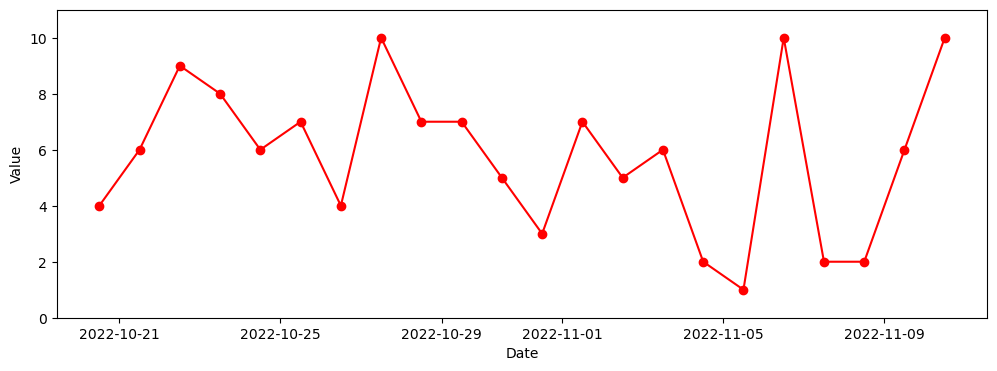

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Create two datetime objects and a vector of dates
start_time = np.datetime64('2022-10-20 12:00:00')
end_time = np.datetime64('2022-11-10 12:00:00')
time_vector = np.array(['2022-10-20', '2022-10-23', '2022-10-28'], dtype='datetime64[s]')
print(time_vector)

# Get time interval between the two times
time_elapsed = end_time - start_time
print(time_elapsed)
print(type(time_elapsed))

# Divide by the duration of 1 second to get number of seconds (as a number object)
seconds_elapsed = time_elapsed / np.timedelta64(1, 's')
print(seconds_elapsed)
print(type(time_elapsed))

# Divide by the duration of 1 day to get number of days
days_elapsed = time_elapsed / np.timedelta64(1, 'D')
print(days_elapsed)

# Create a range of datetimes spaced by 1 day
step = np.timedelta64(1, 'D')
days = np.arange(start_time, end_time + step, step)

# Plot something using days as the x-axis
fig, ax = plt.subplots(figsize=(12, 4))
value = np.random.randint(1, 11, size=len(days))
ax.plot(days, value, 'ro-')
ax.set(ylim=[0, 11], xlabel='Date', ylabel='Value')
plt.show()


🚩 *Task 3a:* Write a function read_heartbeat_data(subject) which takes as input an integer subject between 1 and 10, reads the data in heartbeats.txt for the given subject, and returns it as two NumPy vectors:

times, containing the recorded times of each heartbeat (as datetime64[s] objects),
intervals, containing the recorded intervals between heartbeats (in seconds, as float numbers).
[3 marks]

In [12]:
def read_heartbeat_data(subject):
    """
     
    This function takes as input an integer subject between 1 and 10, 
    reads the data in heartbeats.txt for the given subject,
    and returns it as two NumPy vectors:
    times - containing the recorded times of each heartbeat (as datetime64[s] objects).
    intervals - containing the recorded intervals between heartbeats (in seconds, as float numbers).
    
    """
    
    
    # import the libraries
    import pandas as pd             # imports pandas with calling name pd
    import numpy as np              # imports numpy with calling name np



    # checking if swubject is less than 0 or greater than 10
    if ( subject < 0 or subject > 10 ) :
     
       # if above condition is true then it will raise an exception that
       # subject is invalid
       raise Exception("Sorry, Subject is invalid. It has to be between 0 and 10")
    
    
    
    # define the path of the csv file heartbeat.txt based on value of subject
    csv_path = "dataset/subject_" + str(subject)+"/heartbeats.txt"
    
    
    # imports the csv file relative to csv_path and stores it in data
    data = pd.read_csv( csv_path )
    
    
    # converts 'Time' column of data to an array
    # containing the corresponding recorded times of each heartbeat (as datetime64[s] objects).
    times = np.array ( data['Time'].apply ( lambda x: np.datetime64(x)) )
    
    # converts the 'Interval between heartbeats (s)' column of data to an array 
    # containing the recorded intervals between heartbeats (in seconds, as float numbers)
    intervals = np.array(data['Interval between heartbeats (s)'])
    
    # returns times and intervals as 2 numpy vectors
    return (times,intervals)

---
🚩 ***Task 3b:*** Write a function `hr_from_intervals(intervals)` which takes as input a NumPy vector containing heartbeat interval data (such as that returned by `read_heartbeat_data()`), and returns a NumPy vector of the same length, containing the instantaneous heart rates, in **beats per minute (BPM)**, calculated from the intervals between heartbeats. You should return the heart rates as floating-point numbers.

For instance, an interval of 1 second between heartbeats should correspond to a heart rate of 60 BPM.

**[2 marks]**

In [13]:
def hr_from_intervals(intervals):
    """
     
    This function takes as input a NumPy vector containing heartbeat interval data 
    (such as that returned by read_heartbeat_data()), and 
    returns a NumPy vector of the same length, 
    containing the instantaneous heart rates, in beats per minute (BPM), 
    calculated from the intervals between heartbeats
    
    """
    
    
    # return array, containing the instantaneous heart rates, in beats per minute (BPM).
    # calculated from the intervals between heartbeats
    
    return (intervals * 60)

---
## Task 4: Data cleaning

There are gaps and measurement errors in the heartbeat data provided by the device. These errors will likely appear as outliers in the data, which we will now try to remove.

One possible method is to remove data points which correspond to values above and below certain **percentiles** of the data. Removing the data below the $p$th percentile means removing the $p\%$ lowest values in the dataset. (Note that, for instance, the 50th percentile is the median.)

---
🚩 ***Task 4a:*** Write a function `clean_data(times_raw, hr_raw, prc_low, prc_high)` which takes 4 inputs:

- `times_raw` is the NumPy array of timestamps returned by `read_heartbeat_data()`,
- `hr_raw` is the NumPy array of computed heart rate values returned by `hr_from_intervals()`,
- `prc_low` and `prc_high` are two numbers such that $0\leq$ `prc_low` $<$ `prc_high` $\leq 100$.

Your function should return two NumPy arrays of the same length, `times` and `hr`, which are the original arrays `times_raw` and `hr_raw` where all the measurements (heart rate and associated time stamp) below the `prc_low`th percentile and above the `prc_high`th percentile of the heart rate data have been removed.

You may wish to make use of NumPy functionality to calculate percentiles.

**[4 marks]**

In [484]:
def clean_data(times_raw, hr_raw, prc_low, prc_high):
    
    
    """
    
    times_raw is the NumPy array of timestamps returned by read_heartbeat_data(),
    hr_raw is the NumPy array of computed heart rate values returned by hr_from_intervals(),
    prc_low and prc_high are two numbers such that  0 ≤ prc_low < prc_high ≤ 100.
    
    This function returns two NumPy arrays of the same length, times and hr, 
    which are the original arrays times_raw and hr_raw where all the measurements 
    (heart rate and associated time stamp) below the prc_lowth percentile and above the prc_highth percentile
    of the heart rate data have been removed.
    
    
    """
        
        
    
    # import the libraries
    import numpy as np              # imports numpy with calling name np

    
    # hr
    # hr_raw_low is the prc_low th percentile of hr_raw data
    hr_raw_low = np.percentile(hr_raw, prc_low)
    
    # hr_raw_high is the prc_high th percentile of hr_raw data
    hr_raw_high = np.percentile(hr_raw, prc_high)
    
    
    #  hr is the original array  hr_raw where all the measurements 
    #  below the prc_lowth percentile (= hr_raw_low) and above the prc_highth percentile (= hr_raw_high)
    #  of the heart rate data have been removed 
    hr = np.array([x for x in hr_raw if x >= hr_raw_low and x <= hr_raw_high])
    
    
    
    # times
    # times_raw_low is the prc_low th percentile of times_raw data
    times_raw_low = np.percentile(times_raw, prc_low)
    
    # times_raw_high is the prc_high th percentile of times_raw data
    times_raw_high = np.percentile(times_raw, prc_high)
    
    
    #  times is the original array  hr_raw where all the measurements 
    #  below the prc_lowth percentile (= times_raw_low) and above the prc_highth percentile (= times_raw_high)
    #  of the heart rate data have been removed 
    times = np.array([x for x in times_raw if x >= times_raw_low and x <= times_raw_high])
    
    

    # if length of hr array is greater than times 
    if len(hr) > len(times):
        
        # then extract its elements to make it equal
        hr=hr[0:len(times)]
        
    # if length of times array is greater than hr
    if len(times) > len(hr):
        
        # then extract its elements to make it equal
        times=times[0:len(hr)]
        
        
        
    # returns times and hr
    return (times,hr)

In [480]:
len(times)

70212

In [475]:
times

array(['2022-07-22T10:16:50.000000000', '2022-07-22T10:16:50.000000000',
       '2022-07-22T10:16:51.000000000', ...,
       '2022-07-23T09:34:33.000000000', '2022-07-23T09:34:33.000000000',
       '2022-07-23T09:34:34.000000000'], dtype='datetime64[ns]')

In [476]:
hr

array([27.18, 22.44, 28.68, ..., 39.72, 20.52, 19.62])

In [479]:
len(hr[0:len(times)])

70212

---
🚩 ***Task 4b:*** Write a function `evaluate_cleaning(subject)`, which takes as input an integer `subject` between 1 and 10 indicating the subject number, and plots the following two histograms for that subject:

- a histogram of the raw heart rate data,
- a histogram of the heart rate data after cleaning with `clean_data()`, where the bottom 1% and the top 1% of the values have been removed.

Your histograms should use a logarithmic scale on the y-axis, and be clearly labelled. You should consider carefully how to lay out the histogram to best present the information.

Your function `evaluate_cleaning()` should call the functions `read_heartbeat_data()`, `hr_from_intervals()`, and `clean_data()` you wrote above, in order to obtain the raw and cleaned heart rate data for a given `subject`.

Then, use your function to display the histograms of the raw and cleaned data for Subject 3. Given that heart rates in adults can typically range from about 40 to 160 beats per minute, and given your histograms, explain why this is a suitable method to remove likely measurement errors in the heart rate data.

**[3 marks]**

---

💾 *If you are stuck on Task 3 or on the task above, you can load the data provided in the `testing` folder to produce your histograms, by running the following commands:*

```python
times_raw = np.load('testing/times_raw.npy')
hr_raw = np.load('testing/hr_raw.npy')
times = np.load('testing/times.npy')
hr = np.load('testing/hr.npy')
```

In [485]:
def evaluate_cleaning(subject):

 """
    
    This function takes as input an integer subject between 1 and 10 indicating the subject number, 
    and plots the following two histograms for that subject:
    
    a histogram of the raw heart rate data,
    a histogram of the heart rate data after cleaning with clean_data(), 
    where the bottom 1% and the top 1% of the values have been removed.
    
    It calls the functions read_heartbeat_data(), hr_from_intervals(), and clean_data(),
    in order to obtain the raw and cleaned heart rate data for a given subject.

    
 """


 # import the libraries
 import matplotlib.pyplot as plt # imports matplotlib.pyplot with calling name plt
 import numpy as np              # imports numpy with calling name np
 


 # read_heartbeat_data(subject)[1] is the interval read from subject csv file and 
 # hrs from interval converts it beats per minutes 

 raw_heart_rate = hr_from_intervals(read_heartbeat_data(subject)[1])
    
 # clean_data returns the cleaned interval with outliers outside of 1 percentile and 99 percentile removed 
 # and stores in clean_heart_rate
 clean_heart_rate = clean_data(read_heartbeat_data(subject)[0], hr_from_intervals(read_heartbeat_data(subject)[1]) , 1 , 99)[1]



 # defining the bins
 bins = np.linspace(3, 5, 200)

 # plots histogram log of clean_heart_rate and log of raw_heart_rate of the subject
 plt.hist(np.log(clean_heart_rate), bins, alpha=0.8, label='clean_heart_rate')  # clean_heart_rate 
 plt.hist(np.log(raw_heart_rate), bins, alpha=0.2, label='raw_heart_rate')       # raw_heart_rate

 # x label and y label of the plot
 plt.ylabel('Frequency')                                       # y label
 plt.xlabel('Logarithm of (heart rates in Beats per minutes)') # x label

 # positioning of legend
 plt.legend(loc='upper right')

 # displays the plot
 plt.show()    

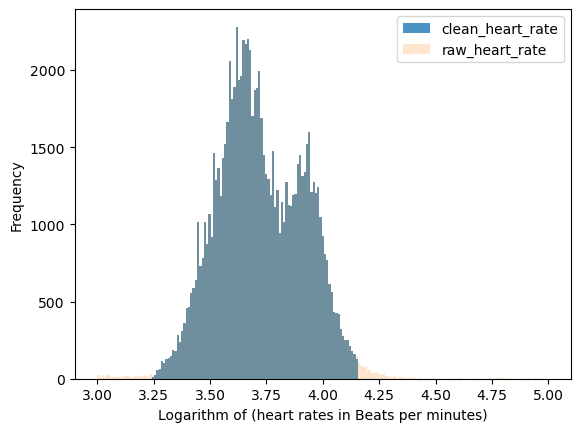

In [486]:
# We run the above function for subject 3 
# and we can see that the highest frequency of heart rates in adults
# is in the interval (3.6888794541139363, 4.0943445622221) which corresponds
# to (40,160) beats per minute clearly from the graph
# also we can say by looking at histogram that outlier raw heart rate which have been removed in clean data
# are well outside that range so much so that they can upset rythm of data if incorporated

evaluate_cleaning(3)

*Use this Markdown cell to write your explanation for Task 4.*

We run the above function for subject 3 and we can see that the highest frequency of heart rates in adults
is in the interval (3.6888794541139363, 4.0943445622221) logarithm (values which corresponds
to (40,160) beats per minute) clearly from the graph.

also we can say by looking at histogram that outlier raw heart rate which have been removed in clean data
are well outside that range so much so that they can upset rythm of data if incorporated.

---
## Task 5: Interpolating the data

Although the device detecting heartbeats was able to measure intervals between beats with millisecond precision, the recorded timestamps could only record the second at which a heartbeat occurred. This means that there are not only time gaps in the data (due to the device missing heartbeats), but also several heartbeats usually recorded in the same second.

For example, this is an excerpt from Subject 7's data, showing a 9-second time gap between `09:19:57` and `09:20:06`, as well as 3 different heartbeats detected at `09:20:06`:

```
59,2022-07-21 09:19:56,1.033
60,2022-07-21 09:19:57,0.942
61,2022-07-21 09:20:06,0.307
62,2022-07-21 09:20:06,0.439
63,2022-07-21 09:20:06,0.297
64,2022-07-21 09:20:07,0.427
```

The goal of this next task is to **interpolate** the recorded data, in order to produce a new dataset containing values of the heart rate at regular time intervals. We will use **linear interpolation**, with the help of SciPy's `interp1d()` function (from the `interpolate` module) which we saw in Week 5.

---
🚩 ***Task 5a:*** The `interp1d()` function from SciPy can only be used with numeric data, and not timestamps. Two functions are provided for you below.

- Explain, in your own words, what both functions do and how.
- Write a few lines of test code which clearly demonstrate how the functions work.

**[2 marks]**

In [487]:
#  will explain what these 2 functions do in very elaborate way while demonstating so for now we will keep it short

# we will see datetime converted to seconds ,
# such that first element of datetime is considered to be beginning of time in seconds 
# and each subsequent value s interval in seconds from previous value is added to make next value also in seconds
# and we will return this as our our corresponding seconds data

def datetime_to_seconds(times):
    return (times - times[0]) / np.timedelta64(1, 's') # each element is difference from first element  divided by 1 second interval makes it seconds data

# we have taken seconds data and start time in which we want to plug the seconds data  
# to create a corresponding timestamp data.
# Please note seconds data itself is created by assuming first time stamp to be 0 th second 
# so now to reverse process we take first element of seconds data and equate it to start time 
#@ which is  of type datestamp so all seconds we add to each successive element is a new timestamp element
# corrsponding to that seconds element. In this way we create a corresponding time stamp data

def seconds_to_datetime(seconds_elapsed, start_time):
    return seconds_elapsed * np.timedelta64(1, 's') + start_time # just inverting formula in above code to create time stamp data by multiplying no of seconds to time interval of 1 second to add to starting point of time stamp data



# Demonstrating usage

# instead of commenting i have written all my information in print statement
# so pls run this block of code and see all my demonstrations in output block , 
# There wont be much comments!!! okay :)

# We will use SUBJECT 7 s data to demonstrate 


print("Demonstrating def datetime_to_seconds(times)")
print(" ")

times=read_heartbeat_data(7)[0]
print(" below we will see datetime converted to seconds ," +
      " such that first element is considered to be beginning of time "+
       " and each subsequent value s interval in seconds from previous value is added to make next value")

print(" ")

print(" 1)  datetime data : ",times)
print(" ")
print("interval between first 2 elements : ",(times[1]-times[0]))

print(" ")
print(" ")

print(" 2)  converted to seconds using datetime_to_seconds(times) function: ",datetime_to_seconds(times))
print(" ")
print("interval between first 2 elements : ",datetime_to_seconds(times)[1]-datetime_to_seconds(times)[0], " seconds")
print(" ")
print("As you can see above both intervals in nanoseconds and seconds represent same unit of time, "+
      "its just that in seconds, first element of datetime is considered as 0 seconds "
      "with this demonstration we can see how our datetime data is converted to seconds to make it convinient")

print(" ")
print(" ")
print(" ")
print(" ")


# Demonstrating seconds_to_datetime(seconds_elapsed, start_time))
print("Demonstrating def seconds_to_datetime(seconds_elapsed, start_time)")
print(" ")

print(seconds_to_datetime(datetime_to_seconds(times), times[0]))
print(" ")

print(" now we have taken seconds data and start time in which we want to plug the seconds data " +
     " to create a corresponding timestamp data "+
     " Please note seconds data itself is created by assuming first time stamp to be 0 th second " +
     " so now to reverse process we take first element of seconds data and equate it to start time which is " +
      " of type datestamp so all seconds we add to each successive element is a new timestamp element " +
     " corrsponding to that seconds element. In this way we create a corresponding time stamp data")
print(" ")

print(" Have a look at seconds data and start time ")
print(" ")

print("seconds data which we converted to time start data using def seconds_to_datetime(seconds_elapsed, start_time) : ",datetime_to_seconds(times))
print(" ")

print(" start time is : ", times[0])


Demonstrating def datetime_to_seconds(times)
 
 below we will see datetime converted to seconds , such that first element is considered to be beginning of time  and each subsequent value s interval in seconds from previous value is added to make next value
 
 1)  datetime data :  ['2022-07-21T09:18:38.000000000' '2022-07-21T09:19:00.000000000'
 '2022-07-21T09:19:01.000000000' ... '2022-07-22T09:29:21.000000000'
 '2022-07-22T09:29:22.000000000' '2022-07-22T09:29:23.000000000']
 
interval between first 2 elements :  22000000000 nanoseconds
 
 
 2)  converted to seconds using datetime_to_seconds(times) function:  [0.0000e+00 2.2000e+01 2.3000e+01 ... 8.7043e+04 8.7044e+04 8.7045e+04]
 
interval between first 2 elements :  22.0  seconds
 
As you can see above both intervals in nanoseconds and seconds represent same unit of time, its just that in seconds, first element of datetime is considered as 0 seconds with this demonstration we can see how our datetime data is converted to seconds to 

*Use this Markdown cell to explain how the functions `datetime_to_seconds()` and `seconds_to_datetime()` work.*


I have already explained that in code block above and out put just writing the gist over here



datetime_to_seconds(times)

each element is difference from first element  divided by 1 second interval makes it seconds data

we will see datetime converted to seconds ,
such that first element of datetime is considered to be beginning of time in seconds 
 and each subsequent value s interval in seconds from previous value is added to make next value also in seconds
 and we will return this as our our corresponding seconds data








def seconds_to_datetime(seconds_elapsed, start_time)

now we have taken seconds data and start time in which 
we want to plug the seconds data  to create a corresponding 
timestamp data  Please note seconds data itself is created 
by assuming first time stamp to be 0 th second  so now 
to reverse process we take first element of seconds data and 
equate it to start time which is  of type datestamp so all seconds 
we add to each successive element is a new timestamp element 
corrsponding to that seconds element. In this way we create a corresponding time stamp data






---
🚩 ***Task 5b:*** Write a function `generate_interpolated_hr(times, hr, time_delta)` which takes as inputs:

- two NumPy vectors `times` and `hr` such as those returned by `clean_data()`,
- a `timedelta64[s]` object representing a time interval in seconds,

and returns two new NumPy vectors, `times_interp` and `hr_interp`, such that:

- `times_interp` contains regularly spaced `datetime64[s]` timestamps, starting at `times[0]`, ending on or less than `time_delta` seconds before `times[-1]`, and with an interval of `time_delta` between consecutive times.
- `hr_interp` contains the heart rate data obtained using **linear interpolation** and evaluated at each time in `times_interp`, for example with the help of the `interp1d()` function from `scipy.interpolate`.

For example, if `times` starts at `10:20:00` and ends at `10:20:09` with a `time_delta` of two seconds, then your `times_interp` vector should contain `10:20:00`, `10:20:02`, `10:20:04`, `10:20:06`, `10:20:08`, and `hr_interp` should consist of the corresponding interpolated heart rate values at each of those times.

**[4 marks]**

In [488]:

def generate_interpolated_hr(times, hr, time_delta):
    
 """
 
 function takes as inputs:
 two NumPy vectors times and hr such as those returned by clean_data(),
 a timedelta64[s] object representing a time interval in seconds,
 
 
 and returns two new NumPy vectors, 
 times_interp and hr_interp, such that:
 
 times_interp contains regularly spaced datetime64[s] timestamps, 
 starting at times[0], ending on or less than time_delta seconds before times[-1],
 and with an interval of time_delta between consecutive times.
 
 hr_interp contains the heart rate data obtained using linear interpolation
 and evaluated at each time in times_interp, for example with the help of the 
 interp1d() function from scipy.interpolate.

 """


 # importing libraries

 from scipy.interpolate import interp1d # importing interp1d
 from scipy import interpolate # importing interpolate
 import math # importing math
 import numpy as np # importing numpy as np



 # seconds_elapsed is the difference in seconds between first time stamp and last time stamp
 seconds_elapsed = (times[-1] - times[0]) / np.timedelta64(1, 's')

 # in question its mentioned time_delta is of delta 64 object type but 
 # in code it runs even wioth an integer number so to confirm its type and that 
 # it doesnt cause any error we streamline it and ensure it is smoothly converted to seconds irrespective of 
 # what it originally was
 time_delta = np.timedelta64(time_delta) / np.timedelta64(1, 's')


 # length of time_interp (= times_interp_len) will be an integer less than seconds_elapsed/time_delta
 times_interp_len = math.floor(seconds_elapsed/time_delta)


 # initializing times_interp as an array of zeros of size times_interp_len
 times_interp = np.zeros(times_interp_len)



 # times_interp is a list of seconds starting from 0 and stepping with time_delta value for each subsequent 
 # element till times_interp_len elements are reached
 for i in range(times_interp_len):
    times_interp[i] = times_interp[i-1] + time_delta
    
 # times_interp now is a corresponding datetime type array with starting element times[0] by calling
 # seconds_to_datetime(times_interp, times[0])
 times_interp=seconds_to_datetime(times_interp, times[0])



 # times s seconds version is times_seconds by calling datetime_to_seconds(times)
 times_seconds = datetime_to_seconds(times)
 
    
 # interpolating times_seconds and hr and storing in interpol
 interpol = interpolate.interp1d(times_seconds,hr)
    
    
    
 # converting times_interp to seconds using datetime_to_seconds(times_interp)
 times_interp_seconds=datetime_to_seconds(times_interp)

    
    
 # interpolating times_interp_seconds to get hr_interp
 hr_interp=interpol(times_interp_seconds)
    
 # returning times_interp and hr_interp
 return (times_interp,hr_interp)
    

---
🚩 ***Task 5c:*** Check your `generate_interpolated_hr()` function by generating interpolated heart rate data for Subject 1 for just the first 100 measurements (after cleaning). You should generate interpolated data with a time interval of 5 seconds. Plot the data points, as well as your interpolated data, and discuss in the Markdown cell below whether your plot is what you expected, and why.

**[2 marks]**

---
💾 *If you are stuck on Task 4, you can use the cleaned data provided in the `testing` folder to check your code, by running the following commands:*

```python
times = np.load('testing/times.npy')
hr = np.load('testing/hr.npy')
```

In [489]:
# generating interpolated heart rate data for Subject 1 for just the first 100 measurements (after cleaning)

# times_raw is the NumPy array of timestamps returned by read_heartbeat_data(),
times_raw = read_heartbeat_data(1)[0][0:100]

# hr_raw is the NumPy array of computed heart rate values returned by hr_from_intervals(),
hr_raw = hr_from_intervals(read_heartbeat_data(1)[1][0:100])



# cleaned time_raw data with outlier of 1 percentile removed
times = clean_data(times_raw, hr_raw, 1, 99)[0]

# cleaned hr_raw data with outlier of 1 percentile removed
hr = clean_data(times_raw, hr_raw, 1, 99)[1]


# generate_interpolated_hr converted times to interpolated times( =times_interp) with 5 seconds 
times_interp = generate_interpolated_hr(times, hr, np.timedelta64(5,'s'))[0]

# generate_interpolated_hr converted hr to interpolated hr( = hr_interp) with 5 seconds
hr_interp = generate_interpolated_hr(times, hr, np.timedelta64(5,'s'))[1]

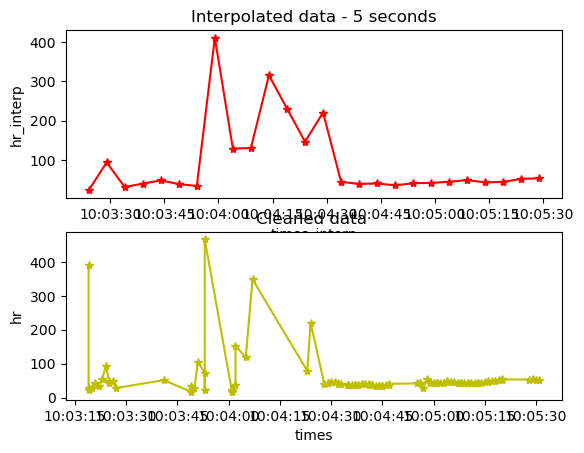

In [490]:
# interpolated data subplot
plt.subplot(2,1,1)

# title
plt.title("Interpolated data - 5 seconds")

# plot
plt.plot(times_interp, hr_interp,  'r*-')

# x label
plt.xlabel("times_interp")

# y label
plt.ylabel("hr_interp")



# cleaned data subplot
plt.subplot(2,1,2)

# title
plt.title("Cleaned data ")

# plot
plt.plot(times, hr,  'y*-')

# x label
plt.xlabel("times")

# y label
plt.ylabel("hr")


# display plot
plt.show()

*Use this Markdown cell for discussing your interpolation results.*

Interpolated data has timedelta of 5 seconds and with that its timestamp value keep
increasing with 5 and IT HAS THEREFORE EQUIDISTANT POINTS ON THE GRAPH
it has lesser points than cleaned data 
because cleaned data have a very negligible and inconsistent gap between its timestamp values
WHICH CAN CLEARLY BE SEEN ON THE FRAPH

the interpolation data fits the data well, the plot looks similar to the real plot with lesser  which we 

---
## Task 6: Smoothing the data with a rolling average

A rolling average is simply an average of the heart rate data, calculated over a given window of time. For example:

- The 20-second rolling average of the heart rate at a time `10:20:00` is the average heart rate over the 20 seconds leading up to that time, i.e. the average of all the heart rates between `10:19:41` and `10:20:00` (inclusive). If we have measurements of the heart rate every 5 seconds, then this would be the average of the heart rates measured at `10:19:45`, `10:19:50`, `10:19:55`, and `10:20:00`.
- We can similarly calculate the 20-second rolling average at the next measurement time, `10:20:05`, as the average heart rate over the 20-second period from `10:19:46` to `10:20:05` (inclusive).

The rolling average essentially smoothes out the sudden jumps in the measured (or interpolated) heart rate data, allowing us to see the longer-term variations more clearly.

---
🚩 ***Task 6:*** Write a function `rolling_average()` which takes as inputs:

- two NumPy vectors `times` and `hr` such as those returned by `clean_data()`,
- a `timedelta64[s]` object `time_delta` representing a time interval in seconds,
- a `timedelta64[s]` object `window`, representing the window duration in seconds (with `window` assumed to be an integer multiple of `time_delta`),

and returns a NumPy vector `hr_rolling` containing values for the rolling average of the heart rate over time, with the given window size.

Your `rolling_average()` function should call `generate_interpolated_hr()` to generate regularly-spaced heart rate data with a time interval `time_delta`, before computing and returning the averaged heart rate data.

Note that `hr_rolling` will be shorter than the length of your interpolated heart rate data, because you can only start computing rolling averages after one window of time has elapsed. (For instance, if your data starts at `10:20:00`, with a 30-second window, the first value of the rolling average you can obtain is at `10:20:29`.)

**[4 marks]**

In [499]:
def rolling_average(times, hr, time_delta, window):
 """
 function rolling_average() takes as inputs:
 two NumPy vectors times and hr such as those returned by clean_data(),
 a timedelta64[s] object time_delta representing a time interval in seconds,
 a timedelta64[s] object window, representing the window duration in seconds 
 (with window assumed to be an integer multiple of time_delta),
 
 and returns a NumPy vector hr_rolling containing values for the rolling average 
 of the heart rate over time, with the given window size.
 rolling_average() function calls generate_interpolated_hr() to generate 
 regularly-spaced heart rate data with a time interval time_delta, before 
 computing and returning the averaged heart rate data.
 
 """


 # import libraries
 import math        # math
 import numpy as np # numpy as np

    
    
 # generate_interpolated_hr(times, hr, time_delta) returns interpolated time stored as times_interp
 times_interp =generate_interpolated_hr(times, hr, time_delta)[0]
    
 # generate_interpolated_hr(times, hr, time_delta) returns interpolated hr stored as hr_interp
 hr_interp =generate_interpolated_hr(times, hr, time_delta)[1]
    
    
    
 # in question its mentioned time_delta is of delta 64 object type but 
 # in code it runs even wioth an integer number so to confirm its type and that 
 # it doesnt cause any error we streamline it and ensure it is smoothly converted to seconds irrespective of 
 # what it originally was
 time_delta = np.timedelta64(time_delta) / np.timedelta64(1, 's')

 
 # in question its mentioned window is of delta 64 object type but 
 # in code it runs even width an integer number so to confirm its type and that 
 # it doesnt cause any error we streamline it and ensure it is smoothly converted to seconds irrespective of 
 # what it originally was  
 window = np.timedelta64(window) / np.timedelta64(1, 's')


 # length of hr rolling will be an integer which when multiplied by size of window stays within hr_interp
 hr_rolling_len=math.floor((time_delta*len(times_interp)/window))

 # initialize hr rolling with zeros and size is hr_rolling_len
 hr_rolling=np.zeros(hr_rolling_len)


 # window_steps is the no of steps of time_delta which will traverse size of a window
 window_steps = int(window/time_delta)



 # for loop :  j = 0 to (hr_rolling_len - 1)
 for j in range(hr_rolling_len):
 
  # step which will traverse hr_interp  is product of j and window_steps
  step = j * window_steps

  # for loop :  1 = 0 to (window_steps - 1)
  for i in range(window_steps):
    
    # j th value of hr rolling is sum of i = 0 to (window_steps - 1) th value of hr_interp
    hr_rolling[j] = hr_rolling[j] + hr_interp[i + step]
    
  # j th value of hr rolling is average of above computed sum with no of hr_interp elements (= window_steps)
  hr_rolling[j] = hr_rolling[j] / window_steps
    
 # returns hr rolling array
 return hr_rolling
    
    

---
## Task 7: Putting it all together

You should now have a series of functions which allow you to:

- read data on measured heartbeart-to-heartbeat intervals for a given subject,
- transform this data into heart rate measurements and clean out the outliers,
- interpolate the data to generate measurements at regular time intervals,
- compute a rolling average of the heart rate data over time, to smooth out the data.

For each subject, there is another file `actigraph.txt`, containing activity data recorded by a separate device. In particular, this data provides another independent measurement of the subjects' heart rate. We can use this to check our work.

---
🚩 ***Task 7:*** Write a function `display_heart_rate(subject)` which takes as input an integer `subject` between 1 and 10, and produces one single graph, containing two plots on the same set of axes:

- a plot of the heart rate data found in `actigraph.txt` over time,
- a plot of the smoothed heart rate data computed by you from the data in `heartbeats.txt`, using interpolated measurements of the heart rate every 3 seconds, and a 30-second window size for the averaging.

Your plot should show good agreement between the two sets of data. Instead of showing the full 24 hours of data, you should choose a period of time over which to plot the heart rate (say, approximately 1 hour), in order to better visualise the results.

Show an example by using your function to display the results for 3 subjects of your choice.

**[4 marks]**

---
💾 *If you are stuck on Task 5 or 6, you can use the actigraph heart rate data provided in the `testing` folder in `actigraph.txt`, and compare this to the smoothed heart rate data provided in the `testing` folder, which you can load by running the following command:*

```python
hr_rolling = np.load('testing/hr_rolling.npy')
```

In [639]:
def display_heart_rate(subject):

 """
 
 function display_heart_rate(subject) which takes as input an integer subject between 1 and 10,
 and produces one single graph, containing two plots :
 
 a plot of the heart rate data found in actigraph.txt over time,
 a plot of the smoothed heart rate data computed by me from the data in heartbeats.txt,
 
 using interpolated measurements of the heart rate every 3 seconds,
 and a 30-second window size for the averaging.

 """
 
  
 # importing libraries

 import pandas as pd # import pandas
 import math # importing math
 import numpy as np # importing numpy as np
    
 # define the path of the csv file heartbeat.txt based on value of subject
 csv_path_heartbeats = "dataset/subject_" + str(subject)+"/heartbeats.txt"
    
 # define the path of the csv file actigraph.txt based on value of subject
 csv_path_actigraph = "dataset/subject_" + str(subject)+"/actigraph.txt"
    
     
 # imports the csv file relative to csv_path and stores it in heartbeats
 # note we will use not this csv file directly because we will use read_heartbeat_data function
 # which inturn calls heartbeat data 
 heartbeats = pd.read_csv( csv_path_heartbeats )

 # imports the csv file relative to csv_path and stores it in actigraph 
 actigraph = pd.read_csv( csv_path_actigraph )
     
 actigraph['Time']=actigraph['Time'].apply(lambda x: np.datetime64(x))
    
 # generating interpolated heart rate data for Subject 1 for just the first 100 measurements (after cleaning)

 # times_raw is the NumPy array of timestamps returned by read_heartbeat_data(),
 times_raw = read_heartbeat_data(subject)[0]

 # hr_raw is the NumPy array of computed heart rate values returned by hr_from_intervals(),
 hr_raw = hr_from_intervals(read_heartbeat_data(subject)[1])



 # cleaned time_raw data with outlier of 5 percentile removed
 times = clean_data(times_raw, hr_raw, 5, 95)[0]

 # cleaned hr_raw data with outlier of 5 percentile removed
 hr = clean_data(times_raw, hr_raw, 5, 95)[1]


 # generate_interpolated_hr converted times to interpolated times( =times_interp) with  seconds 
 times_interp = generate_interpolated_hr(times, hr, np.timedelta64(3,'s'))[0]

 # generate_interpolated_hr converted hr to interpolated hr( = hr_interp) with 3 seconds time delta
 hr_interp = generate_interpolated_hr(times, hr, np.timedelta64(3,'s'))[1]



 #  interpolated measurements of the heart rate every 3 seconds, and a 30-second window size for the averaging.
 hr_rolling=rolling_average(times, hr, np.timedelta64(3,'s'), np.timedelta64(30,'s'))

 # initializing hr_rolling_new containing times_interp no of elements
 hr_rolling_new=np.zeros(len(times_interp))


 # for loop in i to hr rolling
 for i in range(len(hr_rolling)):
    
 # for loop in j to range 10 ( window / time delta is 30/ 3 = 10 so 
 # hr_rolling is averaged over 10 elements of time stamp)
 # duplicate it 10 times we will get same dimensions and it will be easy to plot it
  for j in range(10):
        
    # duplicate each hr rolling to 10 elements 
    # reason is that window / time delta is 30/ 3 = 10 so hr_rolling is averaged over 10 elements of time stamp
    # so if duplicate it 10 times we will get same dimensions and it will be easy to plot it
    hr_rolling_new[(j+i*10)]=hr_rolling[i]

 # hr_rolling = hr_rolling_new
 hr_rolling = hr_rolling_new
 


 # t1 is the least common timestamp in times_interp and actigraph['Time']
 t1 = max(times_interp[0],actigraph['Time'].iloc[0])

 # t2 is the highest common timestamp in times_interp and actigraph['Time']
 t2 = min(times_interp[-1],actigraph['Time'].iloc[-1])
   
    
    
 # substituing actigraph with values between t1 and t2
 actigraph=actigraph [actigraph['Time'] <= t2][actigraph['Time'] >= t1].copy()
    
 # substituing times_interp with values between t1 and t2
 times_interp=times_interp [times_interp <= t2] [times_interp >= t1]
    
    
    
 # fonts

 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # font of axes
 font2 = {'family':'serif','color':'darkred','size':15}

 # font of text displayed on graph
 font_text = {'family':'serif','color':'darkgreen','size':10}
 
    
    
 # plotting title and x,y labels on graph

 # Title
 plt.title("Actigraph Analysis", fontdict = font1)

 # X label
 plt.xlabel("Time", fontdict = font2)

 # Y label
 plt.ylabel("Heart rate", fontdict = font2)



 # Plotting the lines on the graph -  hr_rolling and actigraph["Heart rate (BPM)"] vs time
    
 # actigraph["Time"] VS actigraph["Heart rate (BPM)"]
 plt.plot(actigraph["Time"], actigraph["Heart rate (BPM)"], 'y<-')
    
 # times_interp VS hr_rolling
 plt.plot(times_interp, hr_rolling , 'bo-')

 # display the graph
 plt.show()

/var/folders/qx/tpjbnmy572bd5zmd_q9m9rpw0000gn/T/ipykernel_1442/2170620181.py:99: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actigraph=actigraph [actigraph['Time'] <= t2][actigraph['Time'] >= t1].copy()


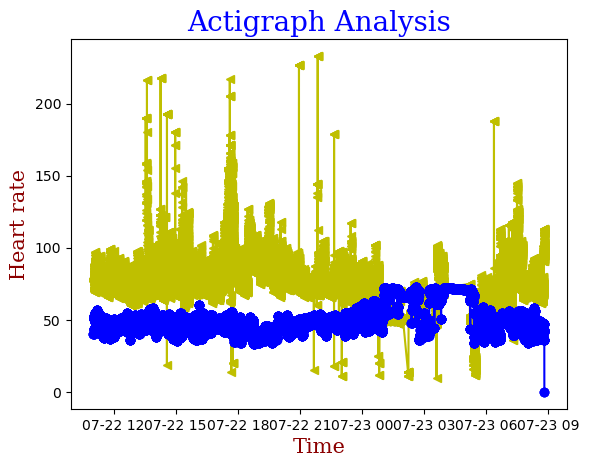

In [640]:
# subject 1
display_heart_rate(1)

/var/folders/qx/tpjbnmy572bd5zmd_q9m9rpw0000gn/T/ipykernel_1442/2170620181.py:99: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actigraph=actigraph [actigraph['Time'] <= t2][actigraph['Time'] >= t1].copy()


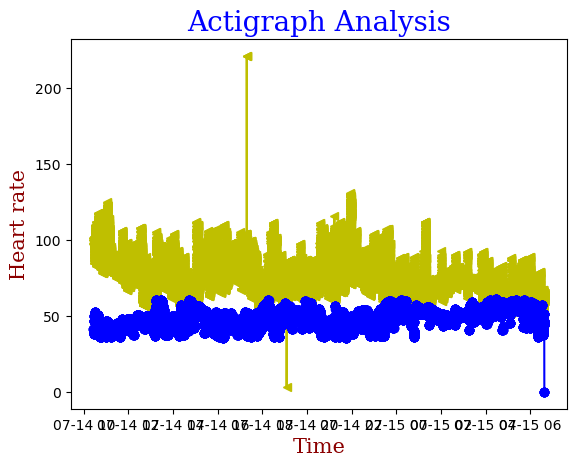

In [641]:
# subject 2
    display_heart_rate(2)

/var/folders/qx/tpjbnmy572bd5zmd_q9m9rpw0000gn/T/ipykernel_1442/2170620181.py:99: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actigraph=actigraph [actigraph['Time'] <= t2][actigraph['Time'] >= t1].copy()


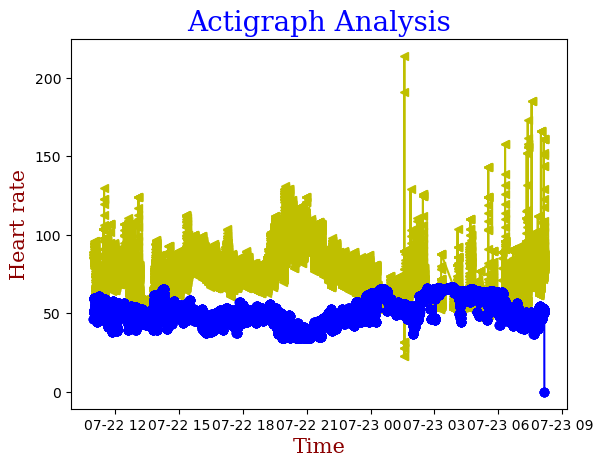

In [642]:
# subject 2
display_heart_rate(5)

---
## Task 8: relating to other data

The data in `actigraph.txt` also contains the following columns:

- `Steps` indicates the number of steps detected per second (using a pedometer).
- `Inclinometer Standing`/`Sitting`/`Lying` indicates the position of the subject, automatically detected by the device.
- `Inclinometer Off` indicates when the device didn't record a position.

In particular, the `Inclinometer ...` columns record either `0` or `1`, and they are mutually exclusive over each row. This means that, for example, a subject can't be recorded simultaneously sitting and standing.

---
🚩 ***Task 8:*** Using the results of your data processing work in previous tasks, can you relate some of this additional data (and/or some of the data in `subject_info.txt`) to the heart rate estimates that you have obtained?

You are free to choose how you complete this task. You will be assessed on the correctness of your code and analysis, the quality of your code (readability, commenting/documentation, structure), and the presentation of your results.

Note that you do not have to use **all** of the extra data to obtain full marks.

**[5 marks]**

---
💾 *If you are using `hr_rolling.npy` and the actigraph data in the `testing` folder, this is the information for this person:*

| Weight | Height | Age |
|:-:|:-:|:-:|
| 85 | 180 | 27 |

In [683]:
def other_features(subject):
 """
 
  We will see how the following factors
  
  Inclinometer Standing/Sitting/Lying indicates the position of the subject, 
  automatically detected by the device.
  Inclinometer Off indicates when the device didn't record a position.
  
  affect heart rates 
  
  for input subject
   we will display a grap[h showing distribution of these features over the time
   and we will analyze exactly how it affects hear rates
  
 """


 # importing 
 import pandas as pd


    
 # csv path relative to the subject  
 csv_path_actigraph = "dataset/subject_" + str(subject)+"/actigraph.txt"
    
    

 # imports the csv file relative to csv_path and stores it in actigraph 
 actigraph = pd.read_csv( csv_path_actigraph )
    
    
 
 # We create dataset corresponding toi the columns under consideration with only first 100 values
    
 # Inclinometer_Off
 actigraph_Inclinometer_Off=actigraph[actigraph["Inclinometer Off"]==1][:100].copy()
    
 # Inclinometer_Standing
 actigraph_Inclinometer_Standing=actigraph[actigraph["Inclinometer Standing"]==1][:100].copy()
    
 # Inclinometer_Sitting
 actigraph_Inclinometer_Sitting=actigraph[actigraph["Inclinometer Sitting"]==1][:100].copy()

 # Inclinometer_Lying
 actigraph_Inclinometer_Lying=actigraph[actigraph["Inclinometer Lying"]==1][:100].copy()

 # hr of actigraph
 hr = np.array(actigraph['Heart rate (BPM)'][:100])

    
 # plot the columns under consideration with respect to time

 # Inclinometer_Off
 plt.plot(actigraph_Inclinometer_Off['Time'], actigraph_Inclinometer_Off['Heart rate (BPM)'],  'y*-',label='Inclinometer Off')

 #Inclinometer_Standin
 plt.plot(actigraph_Inclinometer_Standing['Time'], actigraph_Inclinometer_Standing['Heart rate (BPM)'],  'bo-',label='Standing')
    
 # Inclinometer_Sitting
 plt.plot(actigraph_Inclinometer_Sitting['Time'], actigraph_Inclinometer_Sitting['Heart rate (BPM)'],  'g*-',label='Sitting')

 # Inclinometer_Lying
 plt.plot(actigraph_Inclinometer_Lying['Time'], actigraph_Inclinometer_Lying['Heart rate (BPM)'],  'r*-',label=' Lying')

    
 # fonts

 # font of title
 font1 = {'family':'serif','color':'blue','size':20}

 # font of axes
 font2 = {'family':'serif','color':'darkred','size':15}
 
    
    
 # plotting title and x,y labels on graph

 # Title
 plt.title("Let see some other features - subject "+str(subject), fontdict = font1)

 # X label
 plt.xlabel("times", fontdict = font2)

 # Y label
 plt.ylabel("Heart rates", fontdict = font2)


 plt.legend(loc="upper right")

 # display plot
 plt.show()

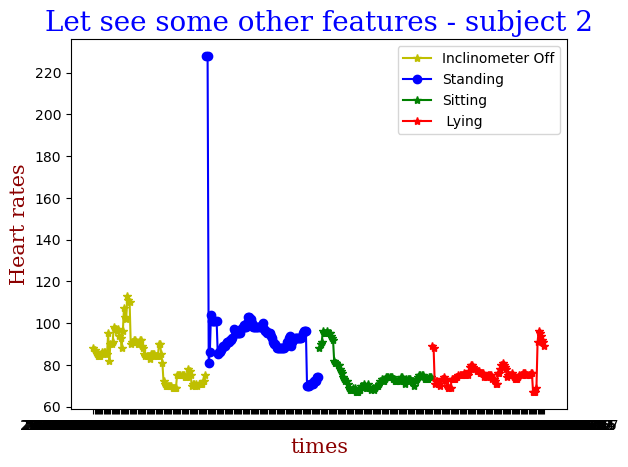

In [684]:
# subject 2
other_features(2)

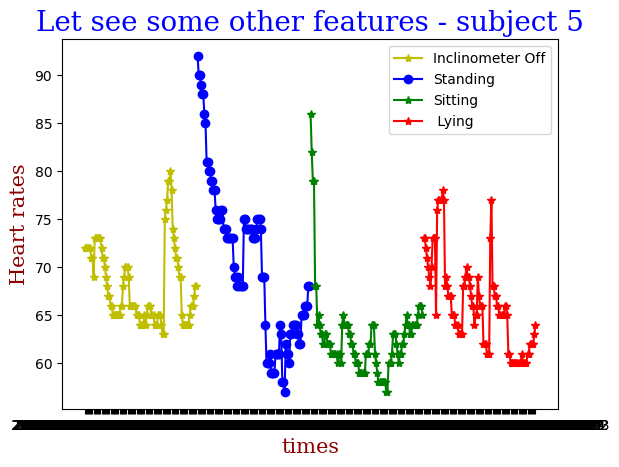

In [685]:
# subject 5
other_features(5)

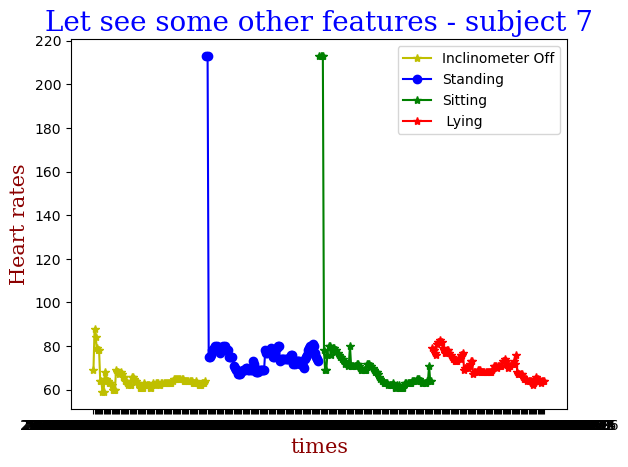

In [686]:
# subject 7
other_features(7)

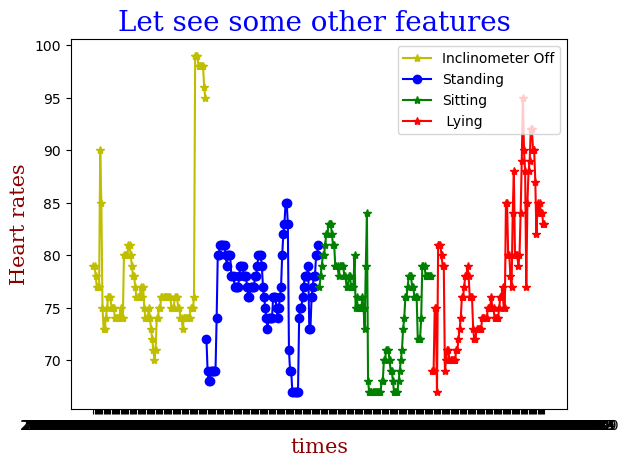

In [682]:
# subject 9
other_features(9)